# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [6]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [7]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [9]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [11]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [13]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [15]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [17]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


/var/folders/5l/86rdg9791k39lvcxv90f8zh00000gn/T/ipykernel_4447/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [19]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


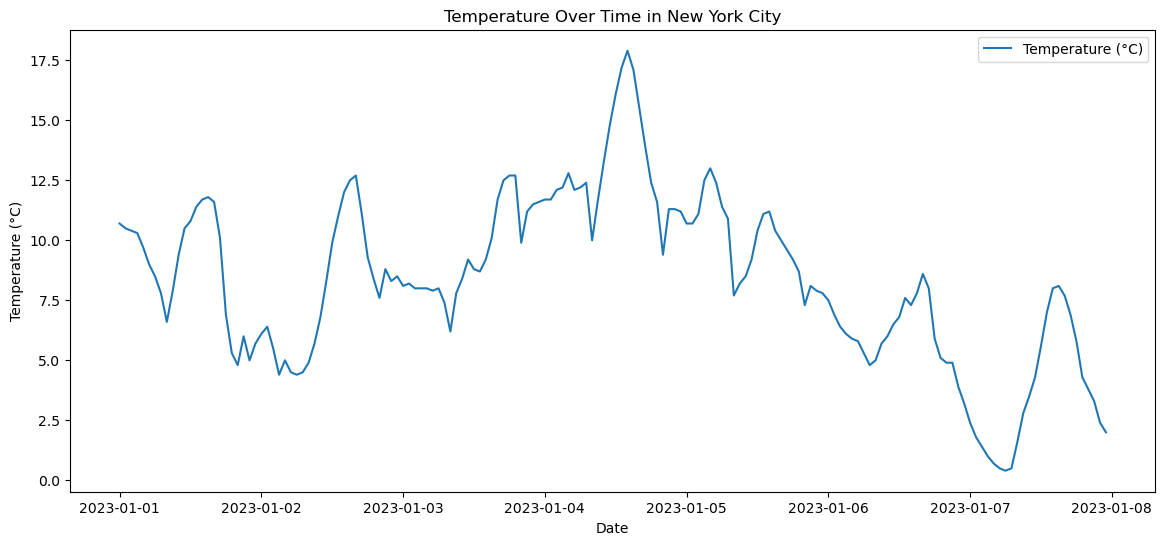

In [21]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

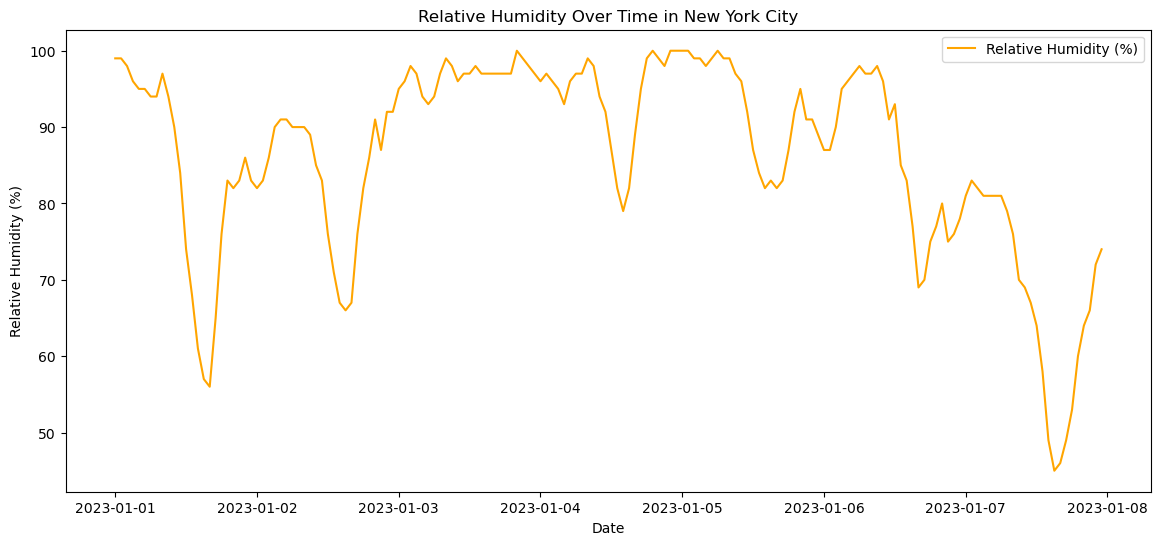

In [23]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


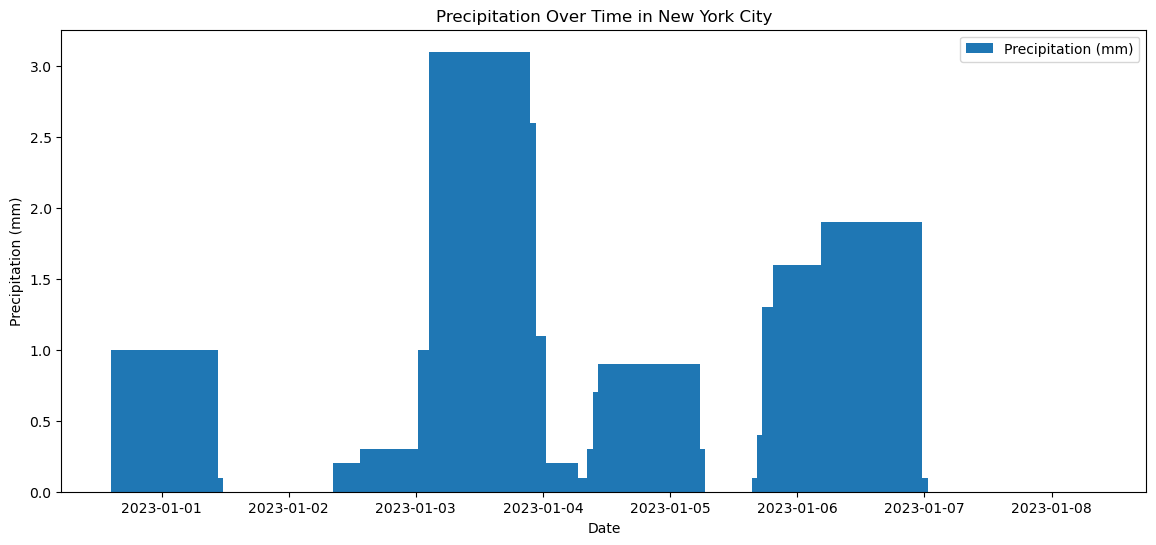

In [25]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [27]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


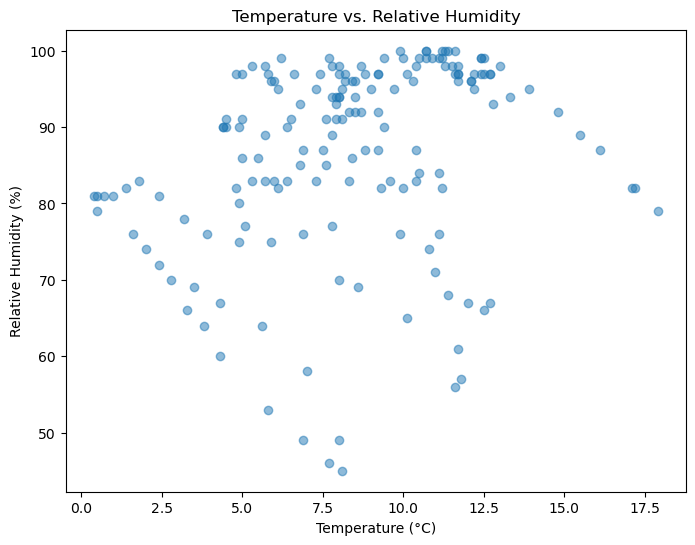

In [29]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [31]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


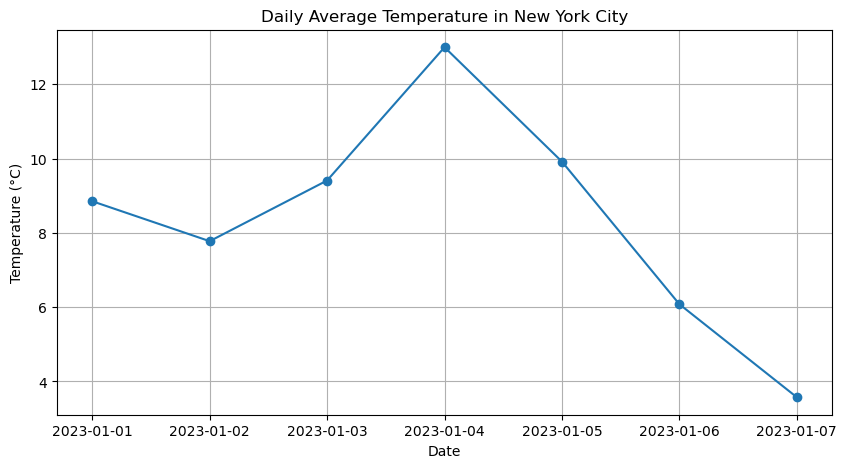

In [33]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [35]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


/var/folders/5l/86rdg9791k39lvcxv90f8zh00000gn/T/ipykernel_4447/4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [37]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [39]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


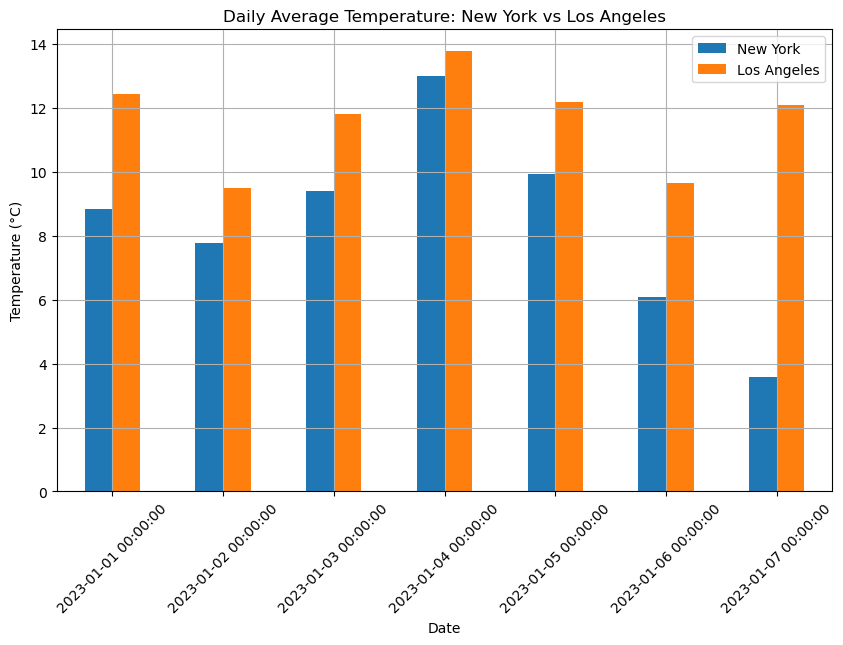

In [41]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [43]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [45]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [273]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

In [275]:
# Step 1: Set Up Parameters

# Location coordinates for London
latitude = 51.5074
longitude = -0.1278

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = ['precipitation']


In [277]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response = requests.get(base_url, params=params)


In [279]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [281]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [283]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


precipitation    0
dtype: int64

In [285]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


/var/folders/5l/86rdg9791k39lvcxv90f8zh00000gn/T/ipykernel_1497/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [287]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()


,precipitation
count,8760.000000
mean,0.075662
std,0.404500
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


In [249]:
# Step 6: Resample Data to Weekly sum

weekly_sum = df.resample('W').sum()
weekly_sum.head()


,precipitation
time,
2022-01-02,2.2
2022-01-09,12.9
2022-01-16,3.1
2022-01-23,0.0
2022-01-30,0.1


In [255]:
# Step 8: Compare with Another Location (Seattle)

# Coordinates for Seattle
latitude_se = 47.6062
longitude_se = -122.3321

params_se = {
    'latitude': latitude_se,
    'longitude': longitude_se,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_se = requests.get(base_url, params=params_se)

# Load and clean Seattle data
data_se = response_se.json()
hourly_data_se = data_se['hourly']
df_se = pd.DataFrame(hourly_data_se)

df_se['time'] = pd.to_datetime(df_se['time'])
df_se.set_index('time', inplace=True)
df_se.fillna(method='ffill', inplace=True)
df_se.describe()

/var/folders/5l/86rdg9791k39lvcxv90f8zh00000gn/T/ipykernel_1497/234134532.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_se.fillna(method='ffill', inplace=True)


,precipitation
count,8760.000000
mean,0.129132
std,0.463708
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.700000


**The maximum amount of rainfall hourly**  
London: 14.7 mm  
Seattle: 7.7 mm

In [257]:
# Resample Seattle Data to Weekly Averages

weekly_sum_se = df_se.resample('W').sum()
weekly_sum_se.head()


,precipitation
time,
2022-01-02,31.3
2022-01-09,108.8
2022-01-16,45.5
2022-01-23,15.7
2022-01-30,6.1


In [289]:
# Combine DataFrames for Comparison

combined_precip = pd.DataFrame({
    'London': weekly_sum['precipitation'],
    'Seattle': weekly_sum_se['precipitation']
})

greater_weeks_Seattle = (combined_precip['London'] < combined_precip['Seattle']).sum()
print(f"London had lesser weekly rainfall than Seattle in {greater_weeks_Seattle} weeks out of 52 weeks in a year 2022.")


London had lesser weekly rainfall than Seattle in 32 weeks out of 52 weeks in a year 2022.


In [291]:
#total precipitation(in mm) in 2022 in London
combined_precip['London'].sum()

662.8000000000001

In [293]:
#total precipitation(in mm) in 2022 in Seattle
combined_precip['Seattle'].sum()

1131.2

**The total yearly rainfall for 2022 in London is lesser than that in Seattle.**

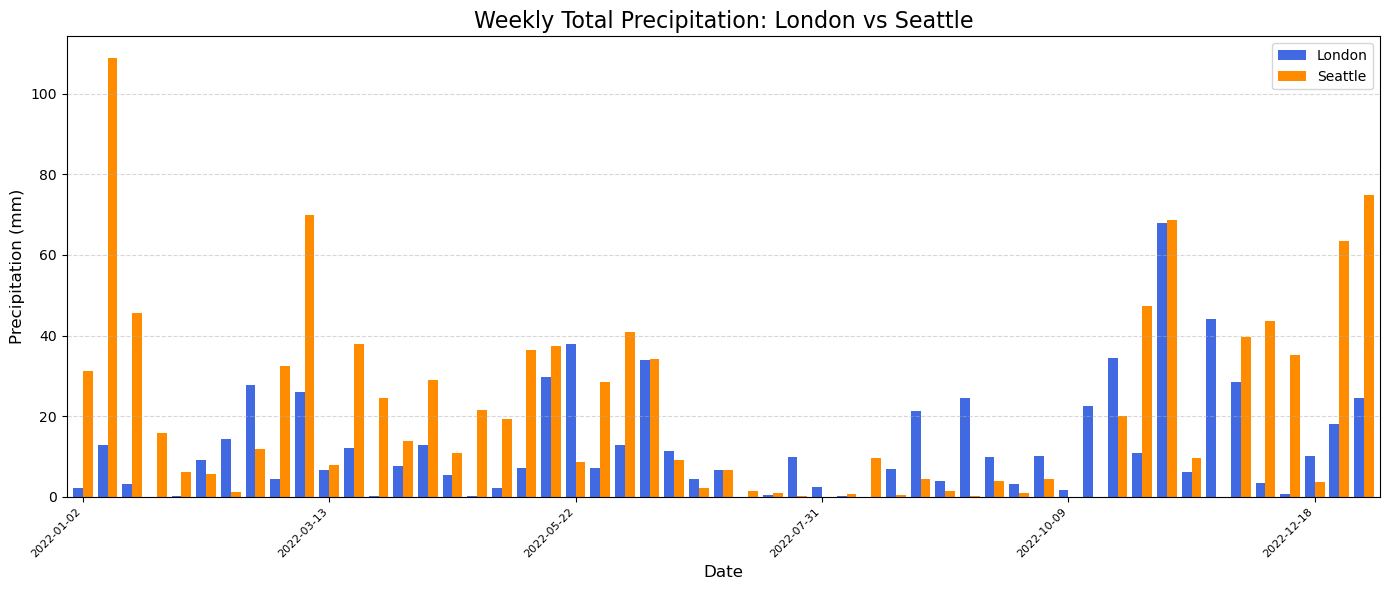

In [296]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 6))

# Plot the bar chart
combined_precip.plot(kind='bar', ax=ax, width=0.8, color=['royalblue', 'darkorange'])

# Get current x-tick locations
xticks = ax.get_xticks()

# Choose how frequently to label (e.g., every 10th tick)
step = 10
visible_ticks = xticks[::step]
ax.set_xticks(visible_ticks)

# Set corresponding labels
labels = combined_precip.index.strftime('%Y-%m-%d').tolist()
ax.set_xticklabels(labels[::step], rotation=45, ha='right', fontsize=8)

# Add title and axis labels
ax.set_title('Weekly Total Precipitation: London vs Seattle', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Precipitation (mm)', fontsize=12)

# Add grid and legend
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

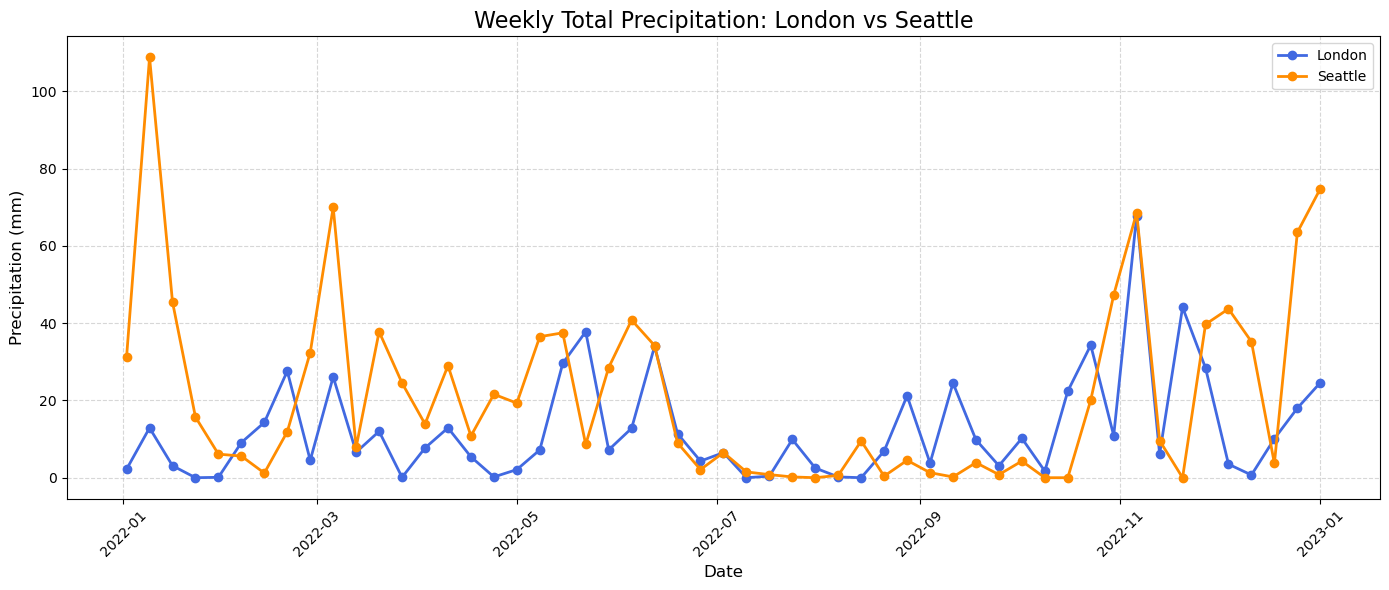

In [298]:
import matplotlib.pyplot as plt

# Make sure the index is datetime and data is resampled weekly if needed
# combined_precip should have datetime index and two columns: 'London', 'Seattle'

plt.figure(figsize=(14, 6))

plt.plot(combined_precip.index, combined_precip['London'], label='London', color='royalblue', linewidth=2, marker='o')
plt.plot(combined_precip.index, combined_precip['Seattle'], label='Seattle', color='darkorange', linewidth=2, marker='o')

# Add title and axis labels
plt.title('Weekly Total Precipitation: London vs Seattle', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)

# Rotate x-axis ticks for clarity
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

# Tidy up layout
plt.tight_layout()

plt.show()

In [300]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('London_precipation_2022.csv')

# Save Los Angeles data
df_se.to_csv('Seattle_precipitation_2022.csv')

**Results**  
Following are the results for precipitation of London and Seattle in 2022:  
1) The maximum amount of rainfall hourly for London is 14.7 mm and for Seattle is 7.7 mm.
2) London have 20 out of 52 weeks in a year with weekly total precipitation greater than that of Seattle.
3) The total precipitation annually is greater for Seattle(1131.2 mm) than that of London(662.8 mm).